In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import itertools 
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Reshape
from keras.models import Model

from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D , Input  ,GRU , Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Bidirectional
from keras.callbacks import LearningRateScheduler
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error

# Model Evaluations
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from keras import callbacks
from keras.callbacks import  CSVLogger
from itertools import cycle

In [ ]:
df_train=pd.read_csv('mitbih_train.csv' , header=None)
df_test=pd.read_csv('mitbih_test.csv' , header=None )

In [ ]:
df_train.rename(columns={187:"Class"}, inplace=True)
df_test.rename(columns={187:"Class"}, inplace=True)

In [ ]:
mapping = {    0. : 'Normal Beat',
               1. : 'Supraventricular premature beat',
               2. : 'Premature ventricular contraction',
               3. : 'Fusion of ventricular',
               4. : 'Unclassifiable beat'}

In [ ]:
df_train['label'] = df_train.iloc[:, -1].map(mapping)
df_test['label'] = df_test.iloc[:, -1].map(mapping)

In [ ]:
label_train = df_train['label'].unique()
label_test = df_test['label'].unique()


In [ ]:
from sklearn.utils import resample

df_1=df_train[df_train['Class']==1]
df_2=df_train[df_train['Class']==2]
df_3=df_train[df_train['Class']==3]
df_4=df_train[df_train['Class']==4]
df_0=(df_train[df_train['Class']==0]).sample(n=20000,random_state=42)


df_train=pd.concat([df_0,df_1,df_2,df_3,df_4])

In [ ]:
X=df_train.iloc[:,:186].values
y=df_train["Class"]

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_test=df_test.iloc[:,:186].values

In [ ]:
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)
X_valid = X_valid.reshape(len(X_valid), X_valid.shape[1],1)


In [ ]:
target_test=df_test["Class"]

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test=to_categorical(target_test)

In [ ]:
n_obs, feature, depth = X_train.shape
batch_size = 500

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM , Flatten
from keras.layers import Dropout
import keras

model = Sequential()

model.add(CuDNNLSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Flatten())
model.add(Dense(200,activation='tanh'))

model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 186, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 182, 32)      192         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 182, 32)      5152        ['conv1d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 182, 32)      0           ['conv1d_1[0][0]']               
                                                                                              

In [ ]:
adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpointer = callbacks.ModelCheckpoint(filepath="./checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('training_set_iranalysis3.csv',separator=',', append=False)
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=50, validation_data=(X_valid, y_valid),callbacks=[es,checkpointer,csv_logger])
model.save("./lstm.hdf5")

Epoch 1/5
149/150 [============================>.] - ETA: 0s - loss: 0.6715 - accuracy: 0.7476

150/150 [==============================] - 11s 28ms/step - loss: 0.6694 - accuracy: 0.7485 - val_loss: 0.4024 - val_accuracy: 0.8629
Epoch 2/5
147/150 [============================>.] - ETA: 0s - loss: 0.2908 - accuracy: 0.8967

150/150 [==============================] - 3s 20ms/step - loss: 0.2893 - accuracy: 0.8973 - val_loss: 0.2548 - val_accuracy: 0.9104
Epoch 3/5
147/150 [============================>.] - ETA: 0s - loss: 0.2070 - accuracy: 0.9279

150/150 [==============================] - 3s 17ms/step - loss: 0.2066 - accuracy: 0.9281 - val_loss: 0.1946 - val_accuracy: 0.9312
Epoch 4/5
149/150 [============================>.] - ETA: 0s - loss: 0.1661 - accuracy: 0.9431

150/150 [==============================] - 2s 16ms/step - loss: 0.1663 - accuracy: 0.9431 - val_loss: 0.1477 - val_accuracy: 0.9498
Epoch 5/5
149/150 [============================>.] - ETA: 0s - loss: 0.1398 - accuracy: 0.9521

150/150 [==============================] - 2s 15ms/step - loss: 0.1400 - accuracy: 0.9521 - val_loss: 0.1283 - val_accuracy: 0.9548


In [ ]:
y_pred = model.predict(X_test, batch_size=500)

44/44 [==============================] - 1s 10ms/step


In [ ]:
# For Plot curve
y_pred_evaluation = to_categorical(np.argmax(y_pred, axis=1), 5)

# For evaluation
y_pred_argmax=(np.argmax(y_pred, axis=1))
y_test_argmax=(np.argmax(y_test, axis=1))

In [ ]:
def Evaluate(X_test , y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

In [ ]:
#Computing the Precision metric (Some times called Specificity): #(True Positives / float(True Positives + False Posivites))  
def macro_precision(y_test , y_pred):
    PrecisionScore = precision_score(y_test, y_pred , average='macro') 
    return PrecisionScore

In [ ]:
#Computing the Recall Score : (Some times called Sensitivity) (TP / float(TP + FN))   1 / 1+2  
def macro_recall(y_test , y_pred):
    RecallScore = recall_score(y_test, y_pred , average='macro') 
    return  RecallScore

In [ ]:
#Computing the F1 Score  : 2 * (precision * recall) / (precision + recall)
def macro_F1Score(y_test , y_pred):
    F1Score = f1_score(y_test, y_pred , average='macro') 
    return F1Score

In [ ]:
# Calculating Area under the curve
def AUC(actual_class, pred_class, average = "micro"):
    
    #Making a set of all the unique classes 
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #Making a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #Making the current class with label 1 and all other classes as a label 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # Calculating the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [ ]:
def plot_roc_curve(y_test,y_pred):
    n_classes=5
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
    plt.figure(figsize=(10, 10))
    plt.plot(fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,)

    plt.plot(fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
           fpr[i],
           tpr[i],
           color=color,
           lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Some extension of Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [ ]:
print("***** Model Evaluations Details ******** \n")
print(Evaluate(X_test , y_test)) 
print("******************************")
print("Precision Score is : " , macro_precision(y_test_argmax , y_pred_argmax))
print("******************************")
print("Recall Scores is : " , macro_recall(y_test_argmax , y_pred_argmax))
print("******************************")
print('F1 Score is : ', macro_F1Score(y_test_argmax , y_pred_argmax))
print("******************************")
print('AUC Score is : ' , AUC(y_test_argmax, y_pred_argmax))

***** Model Evaluations Details ******** 

685/685 [==============================] - 3s 4ms/step - loss: 0.1681 - accuracy: 0.9458

Loss: 0.17, Accuracy: 94.58%
None
******************************
Precision Score is :  0.7309986058854954
******************************
Recall Scores is :  0.9176830039670254
******************************
F1 Score is :  0.790799785727513
******************************
AUC Score is :  {0: 0.9528115838155252, 1: 0.8971419602225981, 2: 0.9582618088382656, 3: 0.9505084851687092, 4: 0.989952929593798}


Text(0, 0.5, 'Loss')

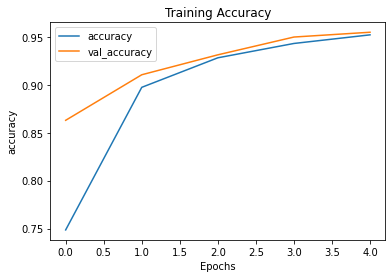

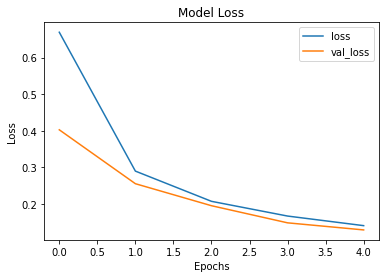

In [ ]:
# converting hsitory to dataframe
pd.DataFrame(history.history)

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

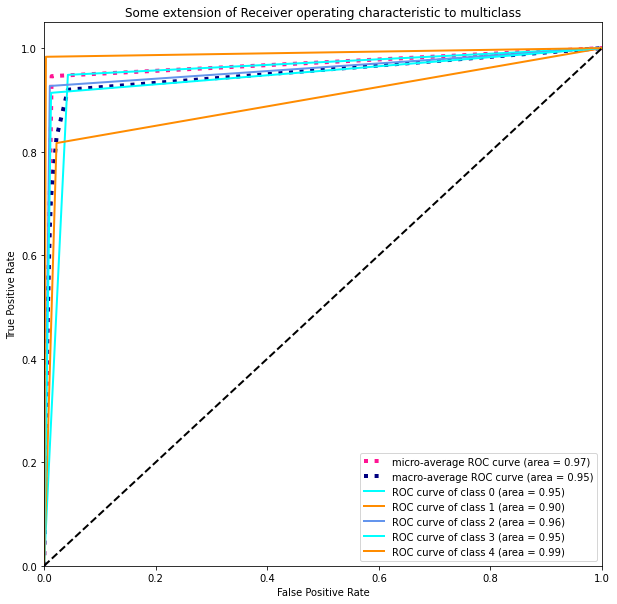

In [ ]:
plot_roc_curve(y_test,y_pred_evaluation)

Confusion matrix, without normalization


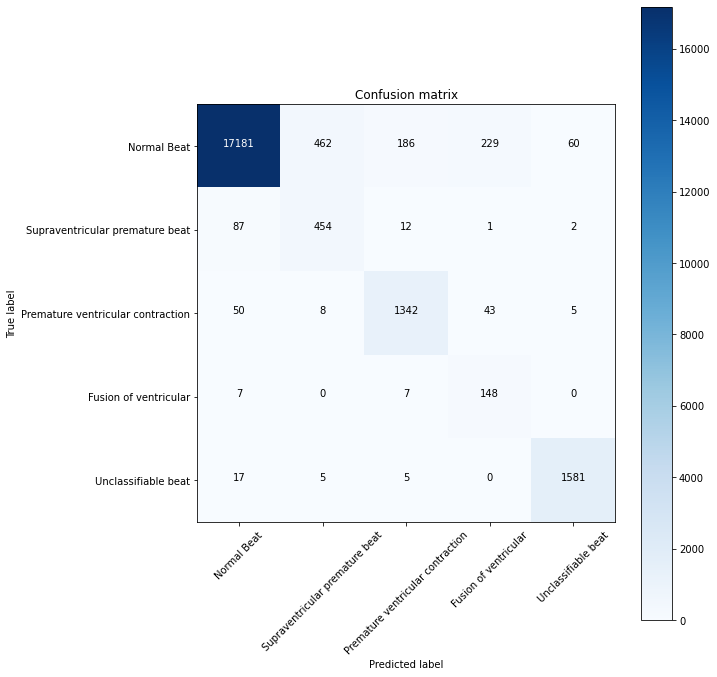

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_argmax, y_pred_argmax)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['Normal Beat', 'Supraventricular premature beat',
       'Premature ventricular contraction', 'Fusion of ventricular',
       'Unclassifiable beat'],
                      title='Confusion matrix')
plt.show()